# Tugas Besar 1 - IF2220 Probabilitas dan Statistika
## Dibuat Oleh
| NIM      | Nama                        |
| -------- | --------------------------- |
| 13521004 | Henry Anand Septian Radityo |
| 13521007 | Matthew Mahendra            |

# Setup

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro, probplot
from IPython.display import display, Markdown, Latex

df = pd.read_csv('anggur.csv')

# Cleanup untuk data NaN jika ada
df = df.dropna()

# SOAL

Diberikan sebuah data anggur.csv yang dapat diakses pada utas berikut: [Dataset Tugas Besar IF2220](https://github.com/MHEN2606/Tubes-IF2220-Probabilitas-dan-Statistika/blob/main/anggur.csv) merupakan data metrik kualitas wine (minuman anggur) yang mengandung 12 kolom sebagai berikut:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality


Kolom 1-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom
target. Anda diminta untuk melakukan analisis statistika sebagai berikut:
1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.
2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.
3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.
4. Melakukan test hipotesis 1 sampel,
- Nilai rata-rata pH di atas 3.29?
- Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
- Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
- Nilai rata-rata total sulfur dioxide di bawah 35
- Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

5. Melakukan test hipotesis 2 sampel,
- Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
- Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
- Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
- Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
- Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

***

## 2.1 SOAL 1

Mean of Data

In [76]:
# Mean dari setiap kolom
df.mean()

fixed acidity            7.152530
volatile acidity         0.520839
citric acid              0.270517
residual sugar           2.567104
chlorides                0.081195
free sulfur dioxide     14.907679
total sulfur dioxide    40.290150
density                  0.995925
pH                       3.303610
sulphates                0.598390
alcohol                 10.592280
quality                  7.958000
dtype: float64

Median of Data

In [77]:
# Median dari setiap kolom
df.median()

fixed acidity            7.150000
volatile acidity         0.524850
citric acid              0.272200
residual sugar           2.519430
chlorides                0.082167
free sulfur dioxide     14.860346
total sulfur dioxide    40.190000
density                  0.996000
pH                       3.300000
sulphates                0.595000
alcohol                 10.610000
quality                  8.000000
dtype: float64

Standar Deviation of Data

In [78]:
# Standar Deviation dari setiap kolom
df.std()

fixed acidity           1.201598
volatile acidity        0.095848
citric acid             0.049098
residual sugar          0.987915
chlorides               0.020111
free sulfur dioxide     4.888100
total sulfur dioxide    9.965767
density                 0.002020
pH                      0.104875
sulphates               0.100819
alcohol                 1.510706
quality                 0.902802
dtype: float64

Variance of Data

In [6]:
# Variance
df.std()**2

fixed acidity            1.443837
volatile acidity         0.009187
citric acid              0.002411
residual sugar           0.975977
chlorides                0.000404
free sulfur dioxide     23.893519
total sulfur dioxide    99.316519
density                  0.000004
pH                       0.010999
sulphates                0.010164
alcohol                  2.282233
quality                  0.815051
dtype: float64

Range of Data

In [7]:
# Range
df.max() - df.min()

fixed acidity            8.170000
volatile acidity         0.665200
citric acid              0.292900
residual sugar           5.518200
chlorides                0.125635
free sulfur dioxide     27.267847
total sulfur dioxide    66.810000
density                  0.013800
pH                       0.740000
sulphates                0.670000
alcohol                  8.990000
quality                  5.000000
dtype: float64

Quantiles of Data

In [8]:
# Q1
df.quantile(0.25)

fixed acidity            6.377500
volatile acidity         0.456100
citric acid              0.237800
residual sugar           1.896330
chlorides                0.066574
free sulfur dioxide     11.426717
total sulfur dioxide    33.785000
density                  0.994600
pH                       3.230000
sulphates                0.530000
alcohol                  9.560000
quality                  7.000000
Name: 0.25, dtype: float64

In [9]:
# Q2
df.quantile(0.5)

fixed acidity            7.150000
volatile acidity         0.524850
citric acid              0.272200
residual sugar           2.519430
chlorides                0.082167
free sulfur dioxide     14.860346
total sulfur dioxide    40.190000
density                  0.996000
pH                       3.300000
sulphates                0.595000
alcohol                 10.610000
quality                  8.000000
Name: 0.5, dtype: float64

In [10]:
# Q3
df.quantile(0.75)

fixed acidity            8.000000
volatile acidity         0.585375
citric acid              0.302325
residual sugar           3.220873
chlorides                0.095312
free sulfur dioxide     18.313098
total sulfur dioxide    47.022500
density                  0.997200
pH                       3.370000
sulphates                0.670000
alcohol                 11.622500
quality                  9.000000
Name: 0.75, dtype: float64

Inter-Quantile Range of Data

In [11]:
# IQR
df.quantile(0.75) - df.quantile(0.25)

fixed acidity            1.622500
volatile acidity         0.129275
citric acid              0.064525
residual sugar           1.324544
chlorides                0.028738
free sulfur dioxide      6.886381
total sulfur dioxide    13.237500
density                  0.002600
pH                       0.140000
sulphates                0.140000
alcohol                  2.062500
quality                  2.000000
dtype: float64

Skewness of Data

In [12]:
# Skewness
df.skew()

fixed acidity          -0.028879
volatile acidity       -0.197699
citric acid            -0.045576
residual sugar          0.132638
chlorides              -0.051319
free sulfur dioxide     0.007130
total sulfur dioxide   -0.024060
density                -0.076883
pH                      0.147673
sulphates               0.149199
alcohol                -0.018991
quality                -0.089054
dtype: float64

Kurtosis of Data

In [13]:
# Kurtosis
df.kurtosis()

fixed acidity          -0.019292
volatile acidity        0.161853
citric acid            -0.104679
residual sugar         -0.042980
chlorides              -0.246508
free sulfur dioxide    -0.364964
total sulfur dioxide    0.063950
density                 0.016366
pH                      0.080910
sulphates               0.064819
alcohol                -0.131732
quality                 0.108291
dtype: float64

Mode of Data

In [99]:
df.mode(numeric_only=True, dropna=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.54,0.5546,0.3019,0.032555,0.015122,0.194679,35.20,0.9959,3.34,0.59,9.86,8.0
1,NaN,NaN,NaN,0.033333,0.020794,0.621628,37.25,0.9961,NaN,NaN,10.31,NaN
2,NaN,NaN,NaN,0.051774,0.024259,0.860177,39.64,0.9965,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077156,0.027209,3.032139,40.61,0.9970,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.084744,0.032111,3.129885,41.05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,5.210260,0.131425,26.630490,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,5.217429,0.133656,26.665773,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,5.252864,0.135368,26.822626,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,5.299524,0.135790,27.006307,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Mode
df['fixed acidity'].mode()

for cols in df:
    temp = "Modus dari " + cols + ":"
    display(Markdown(f"**{temp}**"))
    modus = []
    for i in df[cols].mode():
        modus.append(i)
    display(pd.DataFrame(modus))

**Modus dari fixed acidity:**

,0
0,6.54


**Modus dari volatile acidity:**

,0
0,0.5546


**Modus dari citric acid:**

,0
0,0.3019


**Modus dari residual sugar:**

,0
0,0.032555
1,0.033333
2,0.051774
3,0.077156
4,0.084744
...,...
995,5.210260
996,5.217429
997,5.252864
998,5.299524


**Modus dari chlorides:**

,0
0,0.015122
1,0.020794
2,0.024259
3,0.027209
4,0.032111
...,...
995,0.131425
996,0.133656
997,0.135368
998,0.135790


**Modus dari free sulfur dioxide:**

,0
0,0.194679
1,0.621628
2,0.860177
3,3.032139
4,3.129885
...,...
995,26.630490
996,26.665773
997,26.822626
998,27.006307


**Modus dari total sulfur dioxide:**

,0
0,35.20
1,37.25
2,39.64
3,40.61
4,41.05
5,41.59
6,44.51


**Modus dari density:**

,0
0,0.9959
1,0.9961
2,0.9965
3,0.9970


**Modus dari pH:**

,0
0,3.34


**Modus dari sulphates:**

,0
0,0.59


**Modus dari alcohol:**

,0
0,9.86
1,10.31


**Modus dari quality:**

,0
0,8


***

# SOAL 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

## Kolom "fixed acidity" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

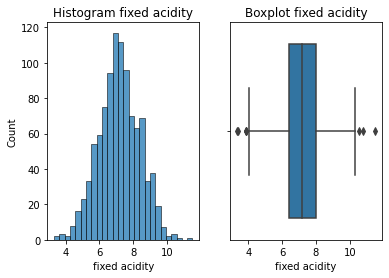

In [113]:
var = df['fixed acidity']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram fixed acidity")
ax[1].set_title("Boxplot fixed acidity")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom fixed acidity cenderung terdistribusi secara merata apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 7.15.

Grafik Box Plot juga menunjukkan data yang cenderung **terdistribusi normal** yang ditunjukkan dari interquartile range yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 3 data yang berada di bawah batas bawah dan 3 data berada diatas batas atas.

## Kolom "folatile acidity" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

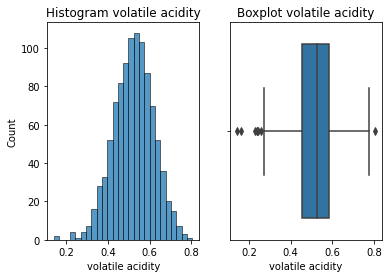

In [16]:
var = df['volatile acidity']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram volatile acidity")
ax[1].set_title("Boxplot volatile acidity")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom folatile acidity memiliki persebaran paling banyak pada nilai di sekitar 0.5. Grafik Histogram terlihat simetris dengan persebaran yang cukup merata.

Grafik Box Plot juga menunjukkan data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 6 data yang berada di bawah batas bawah dan 1 data berada diatas batas atas.

## Kolom "citric acid" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

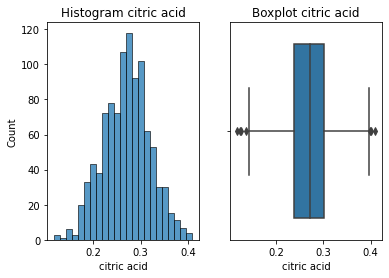

In [17]:
var = df['citric acid']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram citric acid")
ax[1].set_title("Boxplot citric acid")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom citric acid **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 0.27. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari interquartile range yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 4 data yang berada di bawah batas bawah dan 2 data berada diatas batas atas.

## Kolom "residual sugar" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

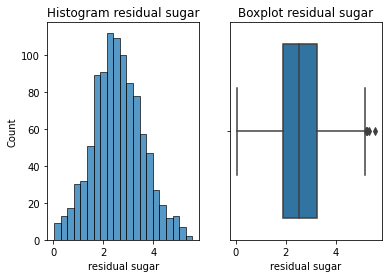

In [18]:
var = df['residual sugar']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram residual sugar")
ax[1].set_title("Boxplot residual sugar")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom residual sugar **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 2.57. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai lebih dari batas atas.

## Kolom "chlorides" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

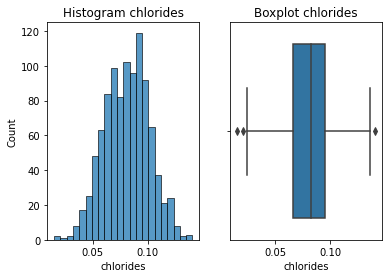

In [116]:
var = df['chlorides']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram chlorides")
ax[1].set_title("Boxplot chlorides")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

# # plot histogram
# sns.histplot(var, kde=True)
# plt.show()

# plot QQ plot
# probplot(var, dist="norm", plot=plt)
# plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom chlorides **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 0.08. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai lebih dari batas atas yaitu 1 data dan terdapat pula 2 data kurang dari batas bawah.

## Kolom "free sulfur dioxide" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

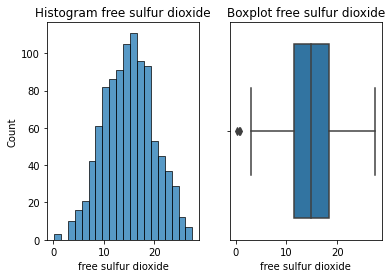

In [20]:
var = df['free sulfur dioxide']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram free sulfur dioxide")
ax[1].set_title("Boxplot free sulfur dioxide")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

# probplot(var, dist="norm", plot=plt)
# plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom free sulfur dioxide **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 14.9. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai kurang dari batas bawah.

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom free sulfur dioxide memiliki persebaran paling banyak pada nilai di sekitar 0.5. Grafik Histogram terlihat cukup simetris dengan persebaran yang cukup merata.

Grafik Box Plot juga menunjukkan data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 6 data yang berada di bawah batas bawah dan 1 data berada diatas batas atas.

## Kolom "total sulfur dioxide" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

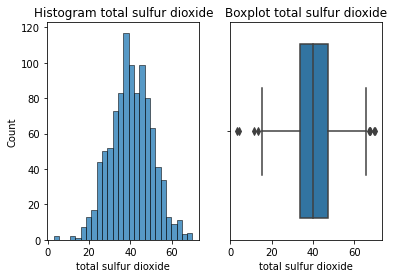

In [21]:
var = df['total sulfur dioxide']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram total sulfur dioxide")
ax[1].set_title("Boxplot total sulfur dioxide")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom total sulfur dioxide **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 40.29. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai kurang dari batas bawah dan lebih dari batas atas.

## Kolom "density" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

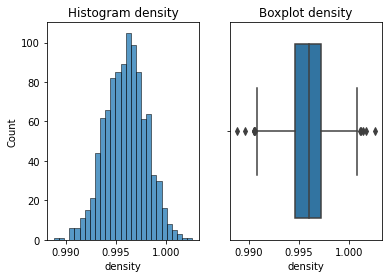

In [22]:
var = df['density']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram density")
ax[1].set_title("Boxplot density")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom density **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 0.99. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai kurang dari batas bawah dan lebih dari batas atas.

## Kolom "pH" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

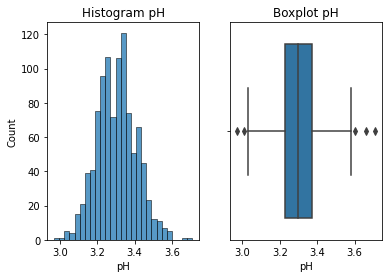

In [23]:
var = df['pH']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram pH")
ax[1].set_title("Boxplot pH")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom pH **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 3.30. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 2 data outlier yang memiliki nilai kurang dari batas bawah dan 3 data yang memiliki nilai lebih dari batas atas.

## Kolom "sulphates" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

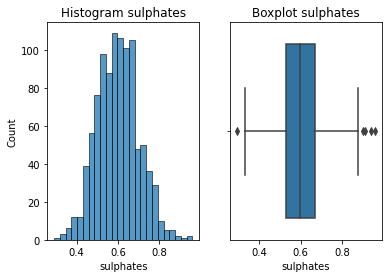

In [24]:
var = df['sulphates']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram sulphates")
ax[1].set_title("Boxplot sulphates")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom sulphates **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 0.60. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat 1 data outlier yang memiliki nilai kurang dari batas bawah dan 4 data yang memiliki nilai lebih dari batas atas.

## Kolom "alcohol" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

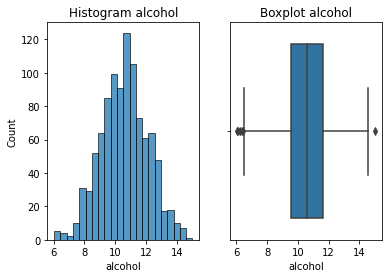

In [25]:
var = df['alcohol']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram alcohol")
ax[1].set_title("Boxplot alcohol")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

In [26]:
var.mean()

10.592279999999999

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom alcohol **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 10.59. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat terdapat beberapa data outlier yaitu data yang berada diluar batas atas dan batas bawah. Terdapat beberapa data outlier yang memiliki nilai kurang dari batas bawah dan 1 data yang memiliki nilai lebih dari batas atas.

## Kolom "quality" 

C:\Users\Henry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

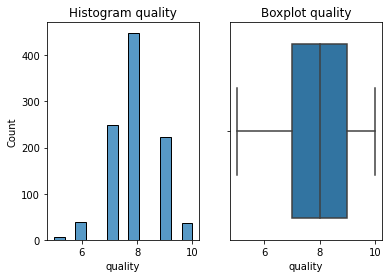

In [27]:
var = df['quality']
plt.figure(figsize=(7,6))
fig,ax = plt.subplots(1,2)
# df[var].hist(ax = ax[0]) matplotlib
sns.histplot(var, ax=ax[0])
ax[0].set_title("Histogram quality")
ax[1].set_title("Boxplot quality")
# df.boxplot(var,ax=ax[1]) matplotlib
sns.boxplot(var,ax=ax[1])
plt.show()

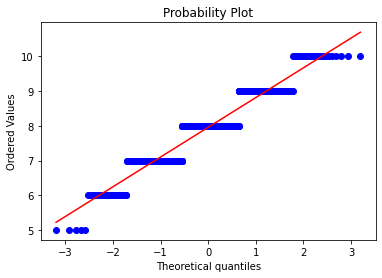

In [28]:
probplot(var, dist="norm", plot=plt)
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran data untuk kolom quality **terdistribusi normal**, apabila dilihat dari grafik yang berbentuk simetris seperti lonceng dan titik tertinggi berada di bagian tengah dari data dan rata-rata data yang ada di angka 10.59. Distribusi normal juga dapat dilihat dari kurva bagian samping yang memiliki frekuensi lebih sedikit dibanding dengan bagian tengah.

Grafik Box Plot juga menunjukkan data yang **terdistribusi normal** yang ditunjukkan dari *interquartile range* yang berada di tengah nilai minimum dan maksimum. Dari box plot juga dapat dilihat tidak ada data outlier yang ada pada kolom quality.

In [29]:
# for var in df.columns:
#     plt.figure(figsize=(7,6))
#     fig,ax = plt.subplots(1,2)
#     # df[var].hist(ax = ax[0]) matplotlib
#     sns.histplot(df[var], ax=ax[0])
#     ax[0].set_title("Histogram " + var)
#     ax[1].set_title("Boxplot " + var)
#     # df.boxplot(var,ax=ax[1]) matplotlib
#     sns.boxplot(df[var],ax=ax[1])
#     plt.show()

# SOAL 3
Pengujian data apakah berdistribusi normal atau tidak menggunakan gaussian distribution

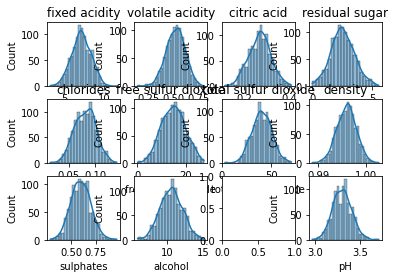

In [30]:
# plt.figure(figsize=(10,9), dpi=200)
fig,ax = plt.subplots(3,4)
for i in range(11):
    if(i < 4):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[0,i])
        ax[0,i].set_title(df.columns[i])
    elif(i < 8):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[1,i-4])
        ax[1,i-4].set_title(df.columns[i])
    elif(i < 12):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[2,i-9])
        # ax[2,i-9].set_title(df.columns[i])
plt.show()

Dibawah ini terdefinisi prosedur untuk pengecekan suatu data terdistribusi normal atau tidak

In [58]:
from scipy.stats import normaltest

def normal_test(col):
    stat, p = normaltest(df[col])

    if p > 0.05:
        display(Markdown("Kolom " + col +" **terdistribusi normal**"))
    else:
        display(Markdown("Kolom " + col +" **tidak terdistribusi normal**"))

    sns.histplot(df[col], bins="auto")
    plt.title('Histogram of ' + col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Kolom Fixed Acidity

Kolom fixed acidity **terdistribusi normal**

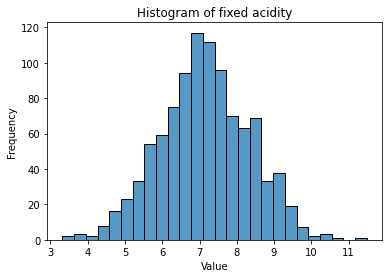

In [59]:
normal_test('fixed acidity')

## Kolom Volatile Acidity

Kolom volatile acidity **tidak terdistribusi normal**

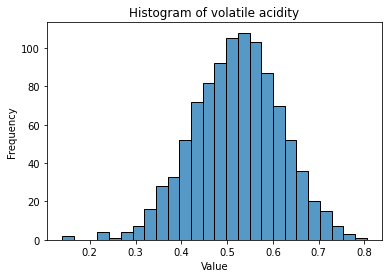

In [62]:
normal_test('volatile acidity')

## Kolom Citric Acid 

Kolom citric acid **terdistribusi normal**

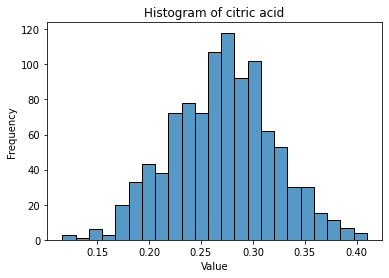

In [63]:
normal_test('citric acid')

## Kolom Residual Sugar

Kolom residual sugar **terdistribusi normal**

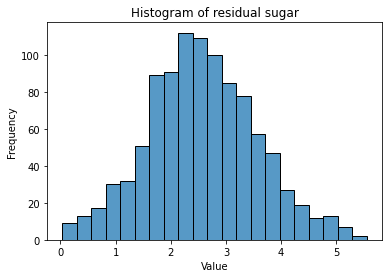

In [64]:
normal_test('residual sugar')

## Kolom Chlorides

Kolom chlorides **terdistribusi normal**

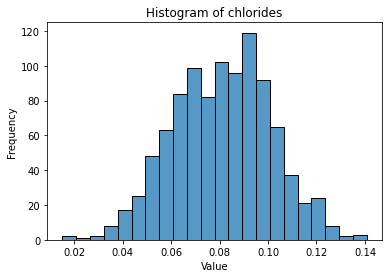

In [66]:
normal_test('chlorides')

## Kolom Free Sulfur Dioxide

Kolom free sulfur dioxide **tidak terdistribusi normal**

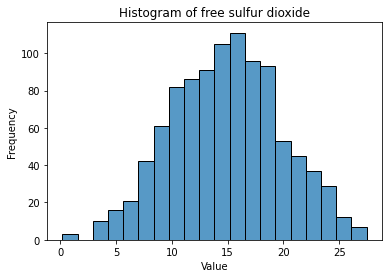

In [67]:
normal_test('free sulfur dioxide')

## Kolom Total Sulfur Dioxide

Kolom total sulfur dioxide **terdistribusi normal**

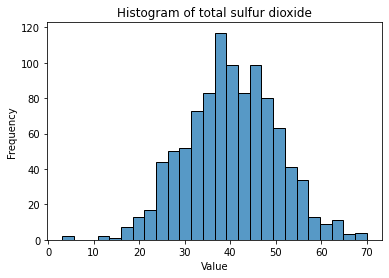

In [68]:
normal_test('total sulfur dioxide')

## Kolom Density

Kolom density **terdistribusi normal**

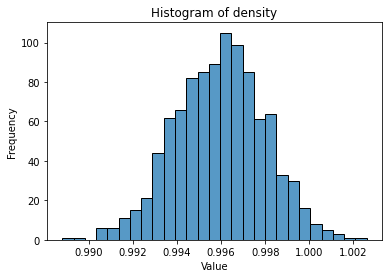

In [70]:
normal_test('density')

## Kolom pH

Kolom pH **terdistribusi normal**

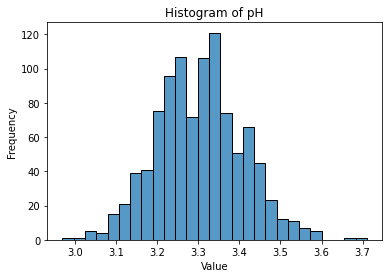

In [71]:
normal_test('pH')

## Kolom Sulphates

Kolom sulphates **terdistribusi normal**

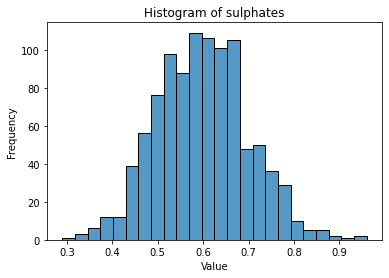

In [74]:
normal_test('sulphates')

## Kolom Alcohol

Kolom alcohol **terdistribusi normal**

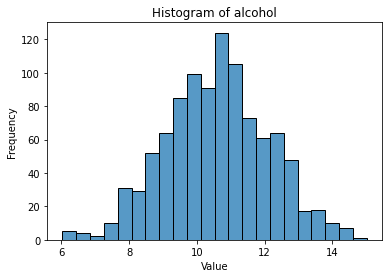

In [73]:
normal_test('alcohol')

## Kolom Quality

Kolom quality **terdistribusi normal**

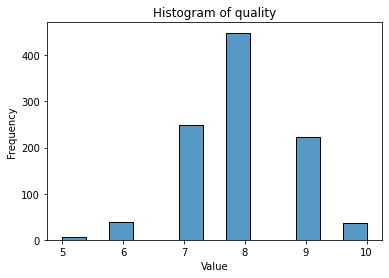

In [72]:
normal_test('quality')

## Penjelasan

# SOAL 4

## a. Nilai rata-rata pH di atas 3.29?

**Tentukan Hipotesis null** 

$H_0 : p = 3.29$

**Tentukan Hipotesis alternatif**

$H_1 : p > 3.29$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [31]:
# H0 : p = 3.29
# H1 : p > 3.29
# Nilai Kepercayaan = 0.05
# Daerah Kritis = z > 1.645
# Komputasi

#Definisikan sig value
sig = 0.05

#cari nilai z
zHit = (df['pH'].mean() - 3.29)/(df['pH'].std()/np.sqrt(1000))

#cari Pvalue
Pval = norm.sf(zHit)
if (Pval < sig):
    print("H0 ditolak: Rata-rata pH-nya lebih dari 3.29")
else:
    print("H0 diterima: Rata-rata pH-nya 3.29 ke bawah")

# if zHit < 1.645:
#     print("H0 diterima: Rata-rata pH-nya 3.29 ke bawah")
# else:
#     print("H0 ditolak: Rata-rata pH-nya lebih dari 3.29")

H0 ditolak: Rata-rata pH-nya lebih dari 3.29


## b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

**Tentukan Hipotesis null** 

$H_0 : p = 2.5$

**Tentukan Hipotesis alternatif**

$H_1 : p \neq 2.5$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [32]:
#4.b
# H0: p = 2.5
# H1: p != 2.5
# Nilai Kepercayaan = 0.05
# Daerah Kritis = z < -1.96 and z > 1.96
# Komputasi
zHit = (df['residual sugar'].mean() - 2.5)/(df['residual sugar'].std()/np.sqrt(1000))

#cari p value untuk two tailed
# Pval = 2*norm.sf(zHit)
pnew = scipy.stats.norm.sf(abs(zHit))
if (pnew<sig):
    print("H0 ditolak: Residual Sugar sama dengan 2.5")
else:
    print("H0 diterima: Residual Sugar tidak sama dengan 2.5")

# if zHit < -1.96 or zHit > 1.96: # di luar
#     print("H0 ditolak: Residual Sugar sama dengan 2.5")
# else:
#     print("H0 diterima: Residual Sugar tidak sama dengan 2.5")

H0 ditolak: Residual Sugar sama dengan 2.5


## c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

**Tentukan Hipotesis null** 

$H_0 : p = 0.65$

**Tentukan Hipotesis alternatif**

$H_1 : p \neq 0.65$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [33]:
testSulphate = df.head(150).copy()
# print(testSulphate.shape)
# H0: p = 0.65
# H1: p != 0.65
# Nilai Kepercayaan = 0.05
# Daerah Kritis = z < -1.96 and z > 1.96
# Komputasi
zHit = (testSulphate['sulphates'].mean() - 0.65)/(testSulphate['sulphates'].std()/np.sqrt(150))

# Pval = 2*norm.sf(zHit)
pnew = scipy.stats.norm.sf(abs(zHit))*2
# print(Pval)
# print(pnew)
if (pnew<sig):
    print("H0 ditolak: Rata-Rata sulphates sama dengan 2.5")
else:
    print("H0 diterima: Rata-Rata sulphates tidak sama dengan 2.5")
# if zHit < -1.96 or zHit > 1.96:
#     print("H0 ditolak: Rata-Rata sulphates sama dengan 2.5")
# else:
#     print("H0 diterima: Rata-Rata sulphates tidak sama dengan 2.5")

H0 ditolak: Rata-Rata sulphates sama dengan 2.5


## d. Nilai rata-rata total sulfur dioxide di bawah 35?

**Tentukan Hipotesis null** 

$H_0 : p = 35$

**Tentukan Hipotesis alternatif**

$H_1 : p < 35$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [34]:
# H0: p = 35 artinya at least 35
# H1: p < 35
# Nilai Kepercayaan = 0.05
# Daerah Kritis = z < -1.645
# Komputasi
zHit = (df['total sulfur dioxide'].mean() - 35)/(df['total sulfur dioxide'].std()/np.sqrt(1000))

pVal = scipy.stats.norm.sf(abs(zHit))
# pVal = norm.sf(zHit)
print(pVal)
if (pVal<sig):
    print("H0 ditolak: rata-rata total sulfur dioxide di bawah 35")
else:
    print("H0 diterima: rata-rata total sulfur dioxide di atas 35")

if zHit > -1.645:
    print("H0 diterima: rata-rata total sulfur dioxide di atas 35")
else:
    print("H0 ditolak: rata-rata total sulfur dioxide di bawah 35")

1.5348545974086137e-63
H0 ditolak: rata-rata total sulfur dioxide di bawah 35
H0 diterima: rata-rata total sulfur dioxide di atas 35


## e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% 

**Tentukan Hipotesis null** 

$H_0 : p = 0.5$

**Tentukan Hipotesis alternatif**

$H_1 : p \neq 0.05$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [35]:
# H0: p = 0.5
# H1: p != 0.5
# n = 1000
# x = 512
xMoreThan40 = df.loc[df['total sulfur dioxide'] > 40]
pTopi = len(xMoreThan40)/1000

Z = (pTopi-0.5)/(np.sqrt(0.5**2/1000))
pVal = scipy.stats.norm.sf(abs(Z))
if (pVal < sig):
    print("H0 ditolak : p != 0.5")
else:
    print("H0 diterima : p = 0.5")
# if (Z < -1.96 or Z> 1.96):
#     print("H0 ditolak : p != 0.5")
# else:
#     print("H0 diterima : p = 0.5")

H0 diterima : p = 0.5


# SOAL 5

## a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

**Tentukan Hipotesis null** 

$H_0 : m1-m2 = 0$

**Tentukan Hipotesis alternatif**

$H_1 : m1-m2 \neq 0$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [36]:
fixedAcidityAwal = df[0:500].copy()
fixedAcidityAkhir = df[500:1000].copy()
m1 = fixedAcidityAwal['fixed acidity'].mean()
m2 = fixedAcidityAkhir['fixed acidity'].mean()

# H0: m1 - m2 = 0
# H1: m1 - m2 != 0
# Derajat Kepercayaan = 0.05
# Daerah Kritis = z < -1.96 and z > 1.96

# Computation
z = (m1-m2-0)/(np.sqrt((fixedAcidityAwal['fixed acidity'].std()**2/500) + (fixedAcidityAkhir['fixed acidity'].std()**2/500)))

pVal = scipy.stats.norm.sf(abs(Z))*2
if (pVal < sig):
    print("H0 ditolak, bagian awal tidak sama dengan bagian akhir rata2nya")
else:
    print("H0 diterima, bagian awal sama dengan bagian akhir rata2nya")
# if(z < -1.960 or z > 1.960):
#     print("H0 ditolak, bagian awal tidak sama dengan bagian akhir rata2nya")
# else:
#     print("H0 diterima, bagian awal sama dengan bagian akhir rata2nya")

H0 diterima, bagian awal sama dengan bagian akhir rata2nya


## b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

**Tentukan Hipotesis null** 

$H_0 : m1 - m2 = 0.001$

**Tentukan Hipotesis alternatif**

$H_1 : m1 - m2 > 0.001$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [37]:
# ini emang ada 2 ya critical valuenya?
chloridesAwal = df[0:500].copy()
chloridesAkhir = df[500:1000].copy()
m1 = chloridesAwal['chlorides'].mean()
m2 = chloridesAkhir['chlorides'].mean()

# H0: m1 - m2 = 0.001
# H1: m1 - m2 > 0.001
# Derajat Kepercayaan: 0.05
# Derajat Kebebasan = 1000 - 2 = 998
# Critical Value t < -1.960 and t > 1.960

# Computation
z = (m1-m2-0.001)/(np.sqrt((chloridesAwal['chlorides'].std()**2/500) + (fixedAcidityAkhir['chlorides'].std()**2/500)))

if(z < -1.960 or z > 1.960):
    print("H0 ditolak, bagian awal lebih besar dari bagian akhirnya ")
else:
    print("H0 diterima, bagian awal tidak lebih besar dari bagian akhirnya")

H0 diterima, bagian awal tidak lebih besar dari bagian akhirnya


## c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

**Tentukan Hipotesis null** 

$H_0 : mVA - mVS = 0$

**Tentukan Hipotesis alternatif**

$H_1 : mVA - mVS \neq 0$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [44]:
splitTwentyFive = df.head(25).copy()
mVA = splitTwentyFive['volatile acidity'].mean()
mS = splitTwentyFive['sulphates'].mean()

# H0: mVA - mVS = 0
# H1: mVA - mVS != 0
# Derajat Kepercayaan: 0.05
# Derajat Kebebasan = 25 + 25 - 2 = 48
# Critical Value t < -2.011 and t > 2.011

# Computation
sp = (splitTwentyFive['volatile acidity'].std()**2 * (24) + splitTwentyFive['sulphates'].std()**2 * (24))/48
t = (mVA - mS - 0)/(np.sqrt(48) * np.sqrt((2/48)))
print(t)
tnew = stats.ttest_ind(splitTwentyFive['sulphates'],splitTwentyFive['volatile acidity'], equal_var = False)
print(tnew)

#Cari nilai P
pVal = scipy.stats.norm.sf(abs(Z))*2
print(pVal)

if (pVal < sig):
    print("H0 ditolak, rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates")
else:
    print("H0 diterima, rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates")

# if(t < -2.011 or t > 2.011):
#     print("H0 ditolak, rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates")
# else:
#     print("H0 diterima, rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates")

-0.05329888073871721
Ttest_indResult(statistic=2.63748216767487, pvalue=0.011534088623658428)
0.4478844782641115
H0 diterima, rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates


## d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

**Tentukan Hipotesis null** 

$H_0 : v1 = v2$

**Tentukan Hipotesis alternatif**

$H_1 : v1 \neq v2$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [60]:
# H0 : v1 = v2
# H1 : v1 != v2

rs = df['residual sugar'].copy()
r1 = rs[:500]
r2 = rs[500:1000]

#cari critical region
batas1 = scipy.stats.f.ppf(q=1-0.975, dfn=499, dfd=499)
# print(batas1)
batas2 = scipy.stats.f.ppf(q=0.975, dfn=499, dfd=499)
# print(batas2)

#cari f nya
v1 = r1.std()**2
v2 = r2.std()**2
f = v1/v2
# print(f)
if (f<batas1 or f>batas2):
    print("H0 ditolak : v1 != v2")
else:
    print("H0 diterima : v1 = v2")

H0 diterima : v1 = v2


## e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

**Tentukan Hipotesis null** 

$H_0 : p1 = p2$

**Tentukan Hipotesis alternatif**

$H_1 : p1 \neq p2$

**Tentukan tingkat signifikan**

$\alpha = 0.05$

In [ ]:
# H0 : p1 = p2
# H1 : p1 != p2
x1MoreThan7 = df.head(500).loc[df['alcohol']>7, "alcohol"]
pTopi1 = len(x1MoreThan7)/1000
x2MoreThan7 = df.tail(500).loc[df['alcohol']>7, "alcohol"]
pTopi2 = len(x2MoreThan7)/1000

#hitung p
p = pTopi1+pTopi2
# display(p)

#hitung z
z = (pTopi1 - pTopi2)/np.sqrt(p*(1-p)*(1/500+1/500))
P = norm.sf(z)
if (P<0.05):
    print("H0 ditolak : p1 = p2")
else:
    print("H1 diterima : p1 != p2")